# Solution Optimization Analysis

In [139]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Load Datasets

In [140]:
raw_textgrad = pd.read_csv("results/raw_textgrad.csv")
raw_textgrad

,id,raw_solution,correct_answer,source,subject,solution_1,solution_2,solution_3,solution_4,solution_5
0,2,Here's how we can determine the number of carb...,A,GPQA-Diamond,-,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...,Here's how we can determine the number of carb...
1,1,The energy-time uncertainty principle states t...,D,GPQA-Diamond,-,The energy-time uncertainty principle states t...,The energy-time uncertainty principle states t...,The energy-time uncertainty principle states t...,The energy-time uncertainty principle states t...,The energy-time uncertainty principle states t...


## Functions

In [141]:
def extract_answer(text):
    # Now extract correctly
    match = re.search(r"(?i)Answer\s*:\s*([A-D])", text, re.IGNORECASE)
    if match:
        return match.group(1).upper()
    return None


In [142]:
def process_answer(row_data):
    data = {
        "correct_answer": row_data["correct_answer"],
        "initial_answer": extract_answer(row_data["raw_solution"]),
        "solution_answer_1": extract_answer(row_data["solution_1"]),
        "solution_answer_2": extract_answer(row_data["solution_2"]),
        "solution_answer_3": extract_answer(row_data["solution_3"]),
        "solution_answer_4": extract_answer(row_data["solution_4"]),
        "final_answer": extract_answer(row_data["solution_5"])
    }
    # Get zero-shot & final result
    data["zero_shot_result"] = data["correct_answer"] == data["initial_answer"]
    data["final_result"] = data["correct_answer"] == data["final_answer"]

    # Majority voting among solution_1 to solution_5
    voted_answers = [
        data["solution_answer_1"],
        data["solution_answer_2"],
        data["solution_answer_3"],
        data["solution_answer_4"],
        data["final_answer"]
    ]
    
    # Filter out None values
    voted_answers = [a for a in voted_answers if a is not None]

    # Get majority answer
    if voted_answers:
        majority_vote = Counter(voted_answers).most_common(1)[0][0]
    else:
        majority_vote = None

    data["majority_answer"] = majority_vote
    data["majority_result"] = data["correct_answer"] == majority_vote

    return data


In [143]:
def process_result_data(result_df):
    processed_answer = []
    for index, row in result_df.iterrows():
        processed_answer.append(process_answer(row))
    return processed_answer

In [144]:
def calculate_true_percentages(df, columns):
    result = {}
    total = len(df)
    for col in columns:
        true_count = df[col].sum()  # Since True == 1 and False == 0
        result[col] = round((true_count / total) * 100, 2)
    return result

In [145]:
def get_clean_processed_data(dataset):
    processed_answer_list = process_result_data(dataset)
    processed_answer = pd.DataFrame(processed_answer_list)
    clean_processed_answer = processed_answer.dropna()
    return clean_processed_answer

def analyze_percentage_data(dataset):
    columns_to_check = ["zero_shot_result", "final_result", "majority_result"]
    clean_processed_answer = get_clean_processed_data(dataset)
    result = calculate_true_percentages(clean_processed_answer, columns_to_check)
    return result

def analyze_visual_iteration_data(dataset):
    iterations = ["initial_answer", "solution_answer_1", "solution_answer_2", "solution_answer_3", "solution_answer_4", "final_answer"]
    accuracies = []
    clean_processed_answer = get_clean_processed_data(dataset)
    
    for col in iterations:
        correct = clean_processed_answer[col] == clean_processed_answer["correct_answer"]
        accuracy = correct.mean() * 100  # Convert to percentage
        accuracies.append(accuracy)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, accuracies, marker='o')
    plt.title("Accuracy at Each Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


## 1. Analysis Raw TextGrad

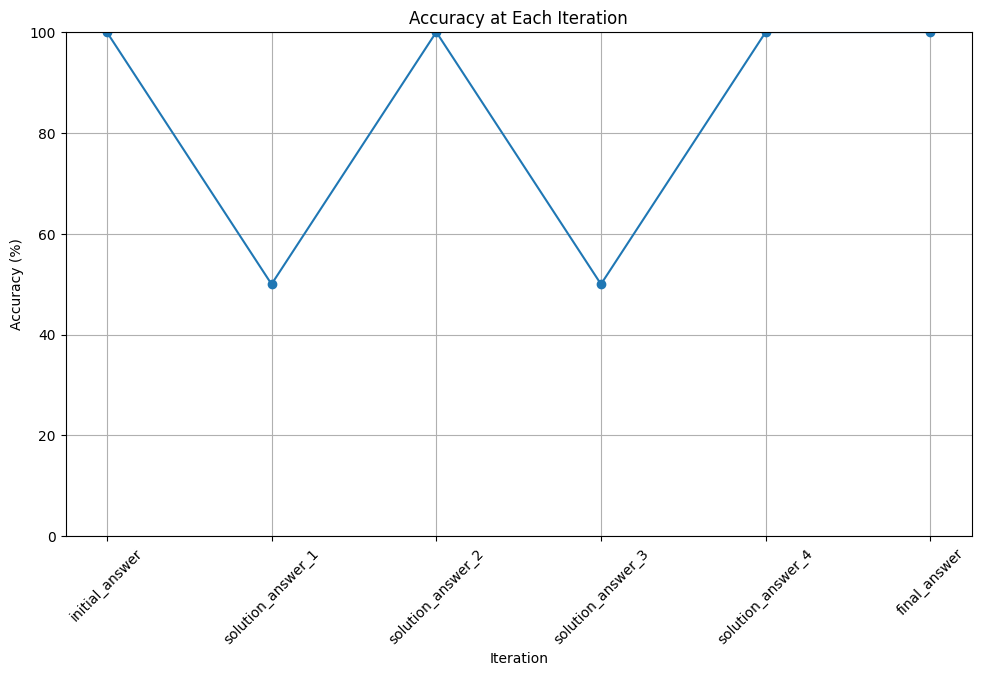

In [146]:
# Visualization
analyze_visual_iteration_data(raw_textgrad)


In [147]:
# Percentages
result = analyze_percentage_data(raw_textgrad)
result

{'zero_shot_result': np.float64(100.0),
 'final_result': np.float64(100.0),
 'majority_result': np.float64(100.0)}